In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import technical_analysis.backtest_kz as bt
from technical_analysis.indicators import Indicators 
from data_pipelines.data_manipulation import DataManipulation
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

SYMBOL = 'BTC-USD'
scale = 1
range_list = [5,6,7,8,10,12,14,15,20]
range_list = [i*scale for i in range_list]
period = 'max'
interval = '1wk'
start_date = ''
end_data = ''
source = 'yahoo'

data = DataManipulation(SYMBOL, source, range_list, period=period, interval=interval, scale=scale, prefix_path='..', saved_to_csv=True)

In [2]:
df = data.df.copy()
df.tail()

,ad,adj_close,adx_10,adx_12,adx_14,adx_15,adx_20,adx_5,adx_6,adx_7,...,wma_10,wma_12,wma_14,wma_15,wma_20,wma_5,wma_6,wma_7,wma_8,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-24,4143739040190.8921,20635.6035,27.6145,28.9407,28.4171,27.8085,23.8048,16.9558,16.9287,20.1585,...,19701.4545,19821.5234,20024.6254,20125.9725,20407.6641,19812.4859,19711.9345,19647.6238,19669.0435,1.0000
2022-10-31,4219259670191.5112,20926.4863,25.2069,27.3840,27.4031,26.9878,23.5110,20.5888,18.1455,19.4222,...,19914.3498,19920.3536,20053.6629,20137.3580,20424.2415,20257.2322,20130.7718,20015.5725,19931.8155,0.0000
2022-11-07,3865589259577.2017,16353.3652,26.1611,27.8896,27.7555,27.3062,23.7659,25.8699,22.1577,22.2270,...,19271.9562,19359.1248,19495.9073,19591.1257,20003.5064,19052.1128,19141.8416,19186.4201,19201.7486,0.0000
2022-11-14,3797143246437.0688,16291.8320,27.0198,28.3531,28.0827,27.6034,24.0080,30.0948,25.5012,24.6312,...,18684.4357,18854.8492,18994.9236,19095.3979,19599.1678,18032.6863,18263.4611,18429.3392,18543.1783,1.0000
2022-11-21,3892909266943.0498,16610.7070,27.9508,28.8820,28.4591,27.9424,24.2697,34.0660,28.7277,27.0251,...,18254.4820,18442.2594,18612.9090,18696.8965,19239.5089,17317.9690,17626.4065,17850.2726,18025.1987,0.0000


In [3]:
ext_df = data.extract_features()

In [4]:
ext_df.tail()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,vol_delta,log_return,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-17,1,0,0,1,0,0,1,0,0.6667,0.6667,...,0,0.0154,1,1,0,0,1,1,0,1.0000
2022-10-24,1,0,1,1,0,0,0,0,0.6667,0.6667,...,1,0.0532,0,1,1,0,0,1,1,1.0000
2022-10-31,0,0,1,1,0,0,0,0,0.6667,0.6667,...,1,0.0140,1,0,1,1,0,0,1,0.0000
2022-11-07,0,0,0,1,0,0,1,0,0.6667,0.6667,...,1,-0.2466,1,1,0,1,1,0,0,0.0000
2022-11-14,0,0,0,1,0,0,1,0,0.6667,0.6667,...,0,-0.0038,1,1,1,0,1,1,0,1.0000


In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
X = ext_df.copy()
X.reset_index(inplace=True)
X.drop(columns=['Datetime', 'feature_label'], axis=1, inplace=True)
Y = ext_df.feature_label.copy()

In [7]:
Y = Y.reset_index()

In [8]:
Y.drop(columns=['Datetime'], axis=1, inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
pred = model.predict(X_test)
pred = pred > 0.5
pred = pred.astype(int)
accuracy_score(pred, y_test)

0.5555555555555556

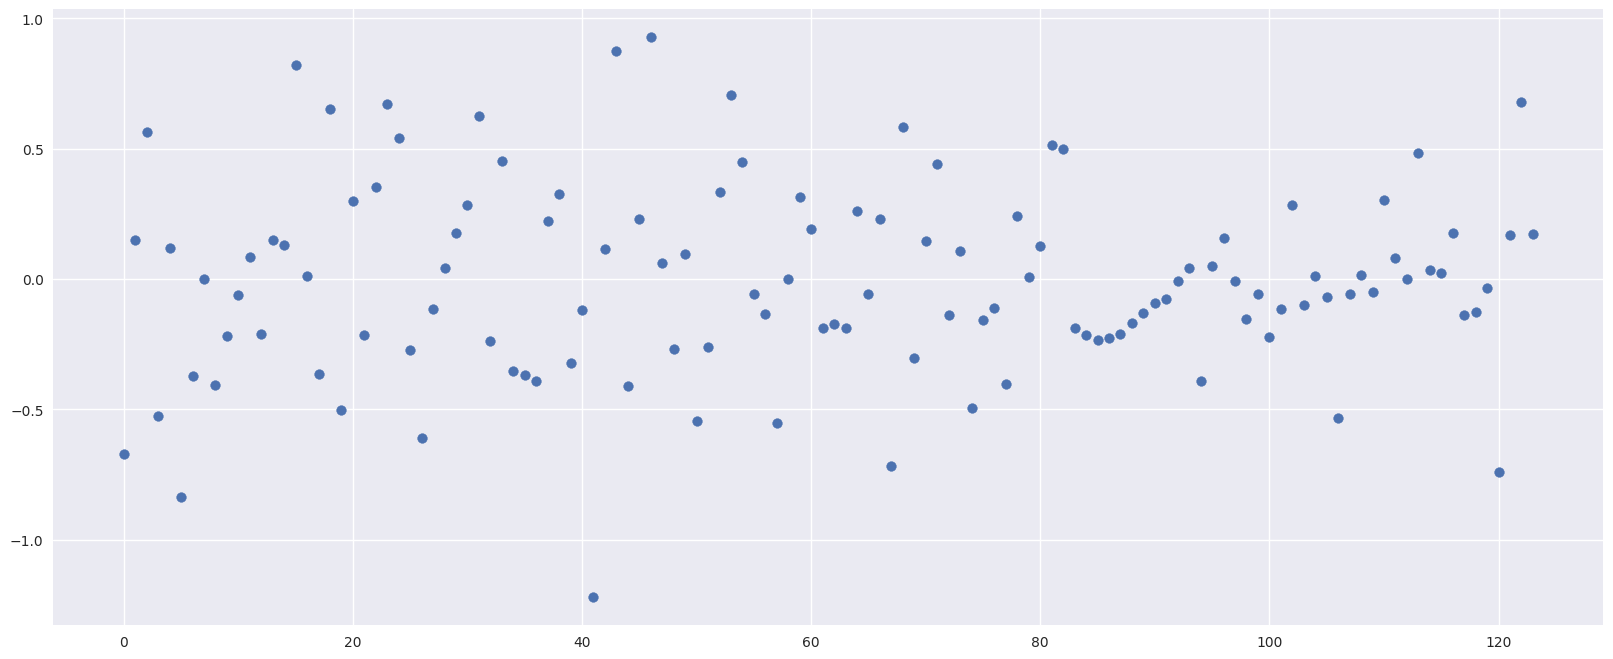

In [12]:
import matplotlib.pyplot as plt
import numpy as np
weigths = model.coef_
fig, ax = plt.subplots(1,1, figsize=(20,8))
plt.scatter(np.arange(0,len(np.column_stack(weigths).ravel())), np.column_stack(weigths).ravel())

In [13]:
np.column_stack(weigths).ravel().size

124

In [14]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [15]:
X_train.shape

(250, 124)

In [16]:
model = Sequential(
    [               
        tf.keras.Input(shape=(X_train.shape[1],)),
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=16, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ], name = "my_model" 
)   

2022-11-25 00:26:56.865799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-25 00:26:56.894790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-25 00:26:56.894871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-25 00:26:56.895861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [17]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               16000     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 26,881
Trainable params: 26,881
Non-trainable params: 0
_________________________________________________________________


In [18]:
[layer1, layer2, layer3, *a] = model.layers

In [19]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (124, 128), b1 shape = (128,)
W2 shape = (128, 64), b2 shape = (64,)
W3 shape = (64, 32), b3 shape = (32,)


In [20]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train, y_train,
    epochs=40
)

Epoch 1/40
8/8 [==============================] - 1s 6ms/step - loss: 0.7008
Epoch 2/40
8/8 [==============================] - 0s 7ms/step - loss: 0.6771
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.6696
Epoch 4/40
8/8 [==============================] - 0s 7ms/step - loss: 0.6568
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.6485
Epoch 6/40
8/8 [==============================] - 0s 5ms/step - loss: 0.6405
Epoch 7/40
8/8 [==============================] - 0s 5ms/step - loss: 0.6290
Epoch 8/40
8/8 [==============================] - 0s 6ms/step - loss: 0.6092
Epoch 9/40
8/8 [==============================] - 0s 8ms/step - loss: 0.5971
Epoch 10/40
8/8 [==============================] - 0s 8ms/step - loss: 0.5886
Epoch 11/40
8/8 [==============================] - 0s 6ms/step - loss: 0.5604
Epoch 12/40
8/8 [==============================] - 0s 5ms/step - loss: 0.5344
Epoch 13/40
8/8 [==============================] - 0s 5ms/step - loss: 0.

In [21]:
pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [22]:
pred = (pred >= 0.5).astype(int)

In [ ]:
pred

In [24]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 100ms/step - loss: 2.0210
test loss, test acc: 2.0210001468658447


In [25]:
print(confusion_matrix(y_test, pred))

[[11 14]
 [25 13]]


In [26]:
accuracy_score(y_test, pred)

0.38095238095238093

In [27]:
pd.DataFrame(pred).value_counts()

0    36
1    27
dtype: int64

In [28]:
ext_df['kz_score'] = ext_df.sum(axis = 1)

<AxesSubplot:xlabel='Datetime'>

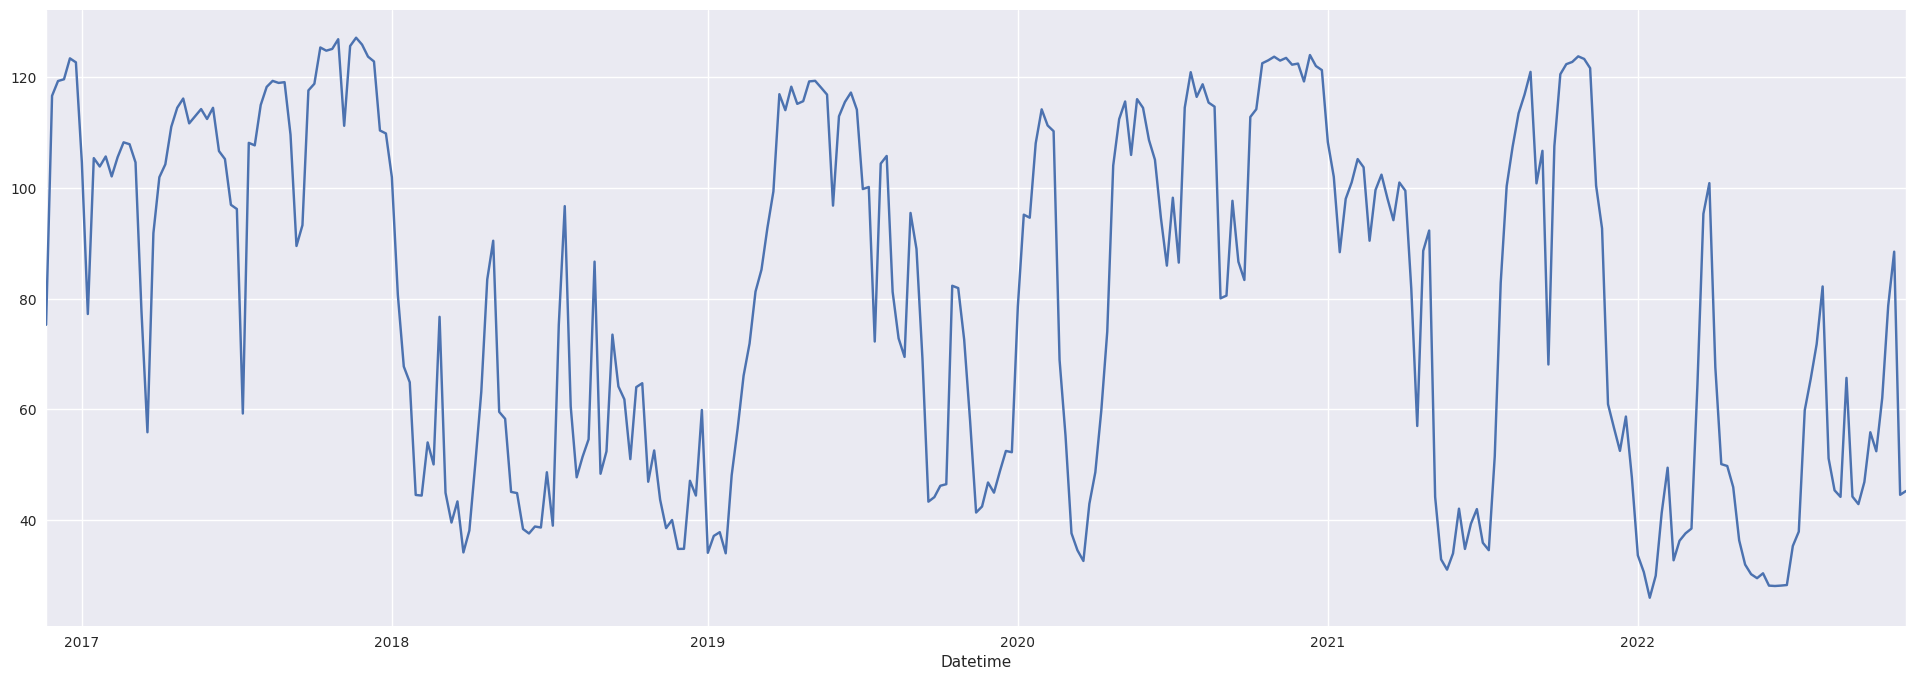

In [29]:
ext_df.kz_score.plot(figsize=(24,8))

In [30]:
ext_df.shape, df.shape

((313, 126), (314, 220))

In [31]:
df.index, ext_df.index

(DatetimeIndex(['2016-11-21', '2016-11-28', '2016-12-05', '2016-12-12',
                '2016-12-19', '2016-12-26', '2017-01-02', '2017-01-09',
                '2017-01-16', '2017-01-23',
                ...
                '2022-09-19', '2022-09-26', '2022-10-03', '2022-10-10',
                '2022-10-17', '2022-10-24', '2022-10-31', '2022-11-07',
                '2022-11-14', '2022-11-21'],
               dtype='datetime64[ns]', name='Datetime', length=314, freq=None),
 DatetimeIndex(['2016-11-21', '2016-11-28', '2016-12-05', '2016-12-12',
                '2016-12-19', '2016-12-26', '2017-01-02', '2017-01-09',
                '2017-01-16', '2017-01-23',
                ...
                '2022-09-12', '2022-09-19', '2022-09-26', '2022-10-03',
                '2022-10-10', '2022-10-17', '2022-10-24', '2022-10-31',
                '2022-11-07', '2022-11-14'],
               dtype='datetime64[ns]', name='Datetime', length=313, freq=None))

<AxesSubplot:>

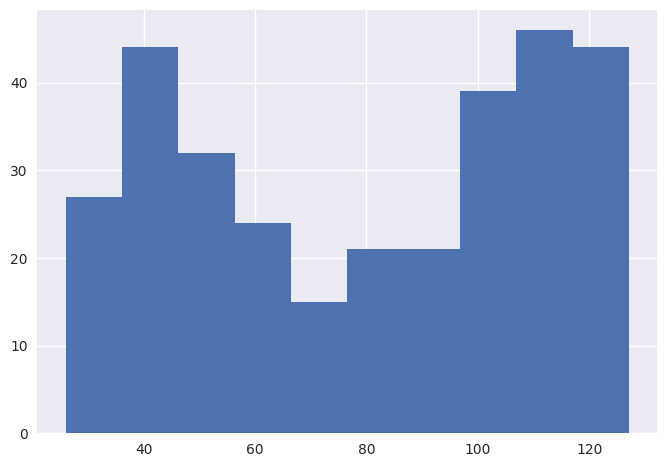

In [32]:
ext_df.kz_score.hist()

Text(0.5, 1.0, 'KZ Index')

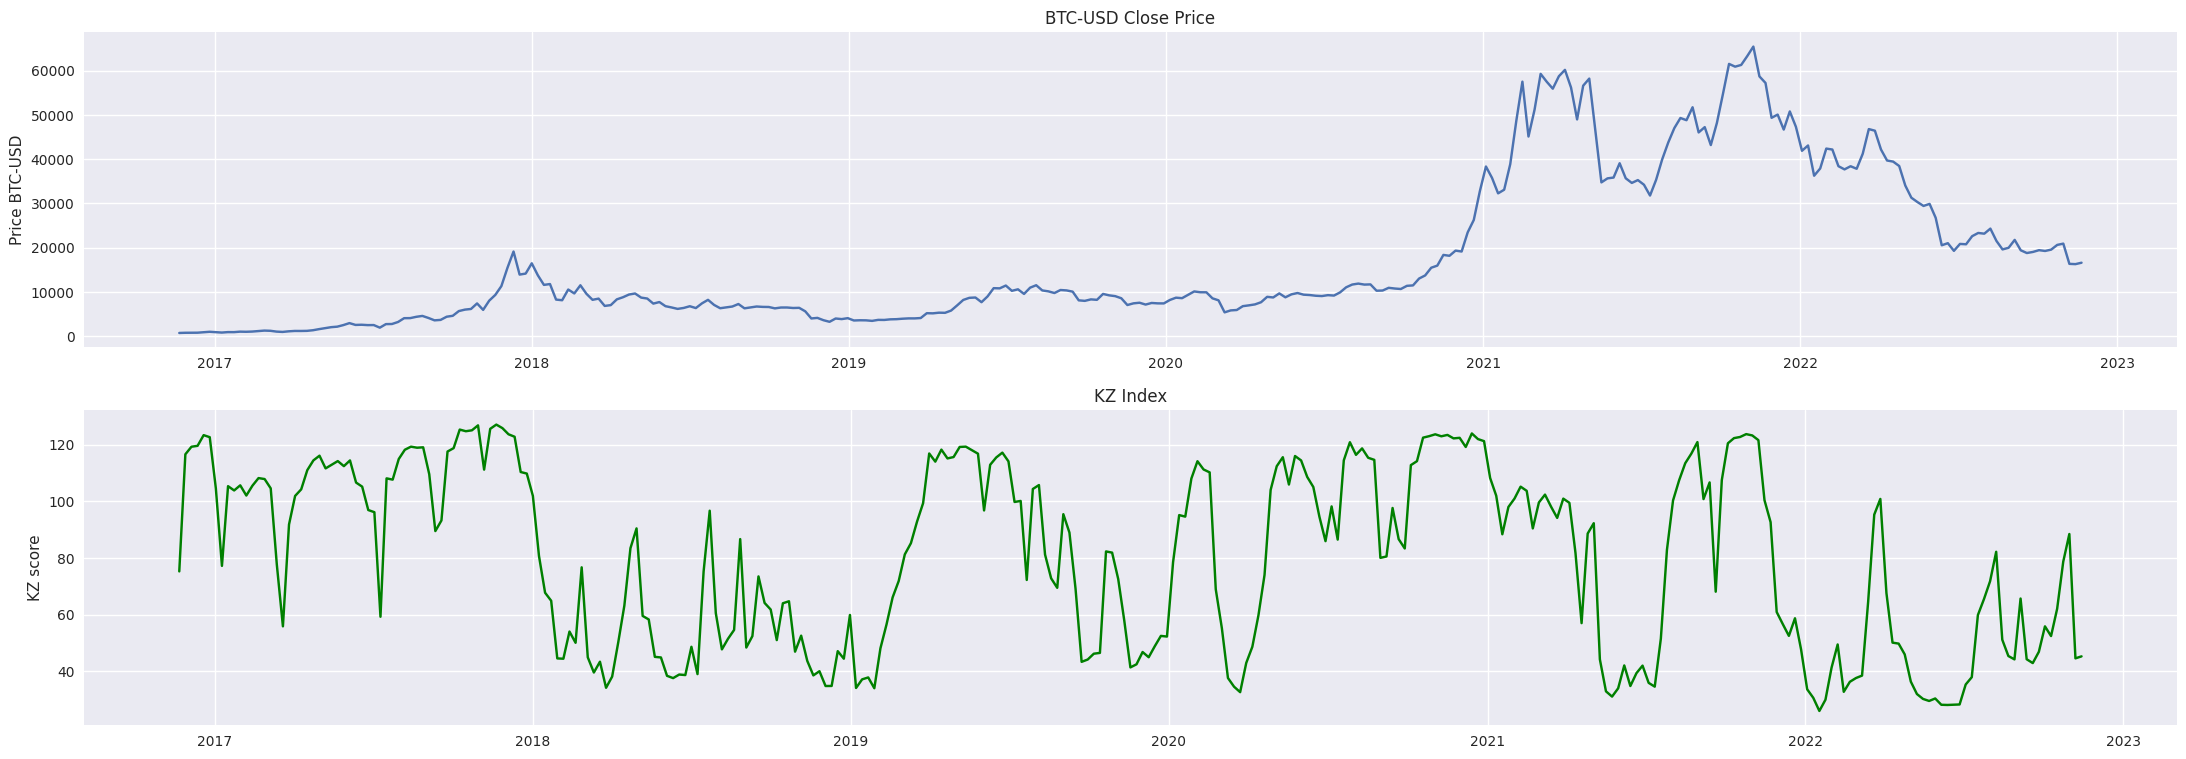

In [33]:
kz = ext_df.kz_score
close = df.close

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(27,9))
ax1.plot(close)
ax1.set_ylabel(f'Price {data.symbol}')
ax1.set_title(f'{data.symbol} Close Price')

ax2.plot(kz, color='green')
ax2.set_ylabel('KZ score')
ax2.set_title('KZ Index')

In [34]:
df.drop(df.index[0], inplace=True)

In [35]:
df['kz_score'] = ext_df.kz_score